In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from matplotlib.pyplot import figure


In [2]:
os.chdir("C:/Users/Kyeongjun/Desktop/LG가전데이터")


# 1. 에러 발생 d-1일 시각화

## 1-1. 에러 발생한 아이디,날짜를 파악 후 전 날 데이터 추출하여 데이터프레임 생성

In [3]:
error_day = pd.read_csv('error_day.csv')
error_day['day'] = pd.to_datetime(error_day['day'].str[:10])

oven = pd.read_csv('Oven_sample.csv', encoding='euc-kr')
oven['LOCAL_TIME'] = pd.to_datetime(oven['LOCAL_TIME'].str[:10])

error_id_day = oven.loc[oven['EVENT'] == '에러 발생',['LOCAL_TIME','DEVICE_ID']]
# 같은 아이디, 같은 날짜인 경우 모두 카운트해서 처리 (106건)
id_day_dup = list(zip(error_id_day.LOCAL_TIME, error_id_day.DEVICE_ID))

error_dup = pd.DataFrame()
for i, j in id_day_dup :
    df0 = error_day.loc[(error_day['day'] == i + datetime.timedelta(days=-1)) & (error_day['DEVICE_ID'] == j),:]
    error_dup = error_dup.append(df0)
    
del df0, i, j

# 같은 아이디 같은 날짜에 두번 이상 에러 발생한 케이스는 한 번으로 처리 (87건)
id_day = list(set(zip(error_id_day.LOCAL_TIME, error_id_day.DEVICE_ID)))

error = pd.DataFrame()
for i, j in id_day :
    df0 = error_day.loc[(error_day['day'] == i + datetime.timedelta(days=-1)) & (error_day['DEVICE_ID'] == j),:]
    error = error.append(df0)
    
del df0, i, j,

error0 = error_day.copy(deep=True)
for i, j in id_day_dup :
    error0.drop(error0[(error0['day'] == i + datetime.timedelta(days=-1)) & (error0['DEVICE_ID'] == j)].index, inplace = True)
    
del i, j
del id_day, id_day_dup, error_id_day

## 1-2. 에러 발생 d-1일 시각화

In [4]:
# error0 : 에러 전날 제외
# error_dup : 에러 전날 (중복)
# error : 에러 전날 (중복X)

error0 = error0[['DEVICE_ID', 'day', 'time', 'micro','others','self','menu','mode','oven','auto','preheat','clean','restart']]
error = error[['DEVICE_ID', 'day', 'time', 'micro','others','self','menu','mode','oven','auto','preheat','clean','restart']]
error_dup = error_dup[['DEVICE_ID', 'day', 'time', 'micro','others','self','menu','mode','oven','auto','preheat','clean','restart']]

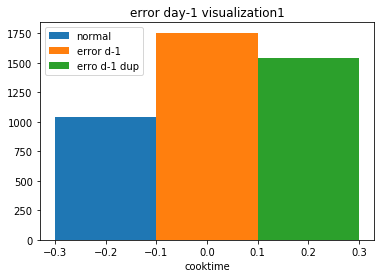

In [5]:
# 요리 시간 비교
plt.bar(-0.2, np.mean(error0.iloc[:,2]), 0.2, label = 'normal')
plt.bar(0, np.mean(error.iloc[:,2]), 0.2, label = 'error d-1')
plt.bar(0.2, np.mean(error_dup.iloc[:,2]), 0.2, label = 'erro d-1 dup')
plt.xlabel('cooktime')
plt.title('error day-1 visualization1')
plt.legend()


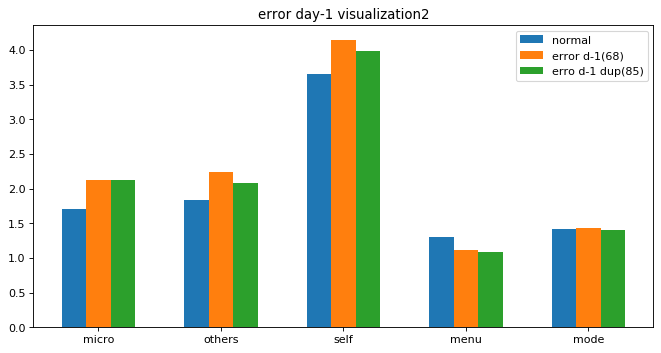

In [6]:
# 레인지모드, 기타모드, 수동요리, 메뉴 개수, 모드 개수 비교
e00 = list(round(np.mean(error0.iloc[:,3:8]), 2))
e0 = list(round(np.mean(error.iloc[:,3:8]), 2))
ed0 = list(round(np.mean(error_dup.iloc[:,3:8]), 2))

x0 = np.arange(len(e00))

figure(figsize=(10, 5), dpi=80)
plt.bar(x0-0.2, e00, 0.2, label = 'normal')
plt.bar(x0, e0, 0.2, label = 'error d-1(68)')
plt.bar(x0+0.2, ed0, 0.2, label = 'erro d-1 dup(85)')
plt.xticks(x0, ['micro','others','self','menu','mode'])
plt.title('error day-1 visualization2')
plt.legend()


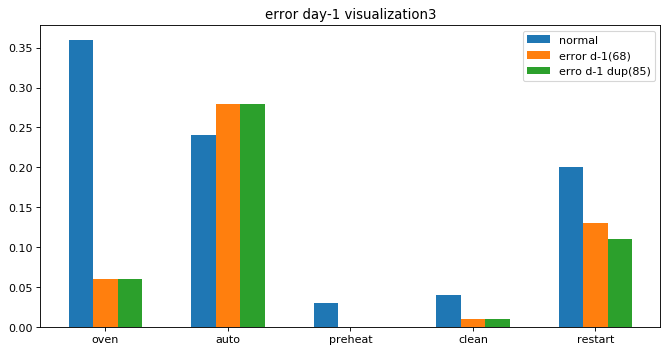

In [7]:
# 오븐모드, 자동모드, 예열, 청소, 재시작 비교
e01 = list(round(np.mean(error0.iloc[:,8:13]), 2))
e1 = list(round(np.mean(error.iloc[:,8:13]), 2))
ed1 = list(round(np.mean(error_dup.iloc[:,8:13]), 2))

x1 = np.arange(len(e01))

figure(figsize=(10, 5), dpi=80)
plt.bar(x1-0.2, e01, 0.2, label = 'normal')
plt.bar(x1, e1, 0.2, label = 'error d-1(68)')
plt.bar(x1+0.2, ed1, 0.2, label = 'erro d-1 dup(85)')
plt.xticks(x0, ['oven','auto','preheat','clean','restart'])
plt.title('error day-1 visualization3')
plt.legend()


# 2. 에러 발생 t-1세션 시각화

## 2.1. 에러 발생한 아이디, 세션을 파악한 후 이전 세션 데이터 추출하여 데이터프레임 생성

In [10]:
oven_s = pd.read_csv('Oven_sample_s.csv', encoding='euc-kr')
oven_s['Cookingtime'] = oven_s['Cook_hour']*60*60 + oven_s['Cook_min']*60 + oven_s['Cook_sec']
oven_s = oven_s.iloc[:,[0,3,4,8,9,10,11,12,13,14,15,16,17]]

df = pd.DataFrame()
for i in list(set(oven.DEVICE_ID)) : 
    df1 = oven_s.loc[oven_s['DEVICE_ID'] == i,]
    time, micro, oven_f, others, auto, self, preheat, clean, restart, menu, mode, error, session, oper = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
    for j in list(set(df1.Session2)) :
        df2 = df1.loc[df1['Session2'] == j,]
        time.append(sum(df2.Cookingtime))
        micro.append(sum(df2.loc[:,'micro_f']))
        oven_f.append(sum(df2.loc[:,'oven_f']))
        others.append(sum(df2.loc[:,'others_f']))
        auto.append(sum(df2.loc[:,'auto_f']))
        self.append(sum(1 - df2.loc[:,'auto_f']))
        preheat.append(sum(df2.loc[:,'preheat_f']))
        clean.append(sum(df2.loc[:,'clean_f']))
        restart.append(sum(df2.loc[:,'restart_f']))
        menu.append(len(set(df2.Cook_menu)))
        mode.append(len(set(df2.Cook_Mode)))
        error.append(1 if (1 in list(df2.error)) else 0)
        session.append(j)
        oper.append(len(df2))
        
    df0 = pd.DataFrame(list(zip(session,time,micro, oven_f, others, auto, self,preheat, clean, restart, menu, mode, error, oper)), columns = ['session', 'time', 'micro', 'oven', 'others', 'auto', 'self', 'preheat', 'clean', 'restart', 'menu', 'mode','error', 'oper'])
    df0['DEVICE_ID'] = i
    
    df = df.append(df0)

del i, j, df1, time, micro, oven_f, others, auto, self, preheat, clean, restart, menu, mode, session, df2, df0, oper, error

df = df[['DEVICE_ID'] + list(df.columns[:-1])]
df.to_csv('error_session.csv', header=True, index=False)

## 2-2. 에러 발생 t-1번 세션 시각화

In [14]:
error_session = pd.read_csv('error_session.csv')
error_session['e'] = 0

for i in range(len(error_session)-1) :
    error_session.iloc[i,15] = 1 if (error_session.iloc[i+1,13] == 1) else 0

error1 = error_session.loc[error_session['e'] == 1,]
error0 = error_session.loc[error_session['e'] == 0,]

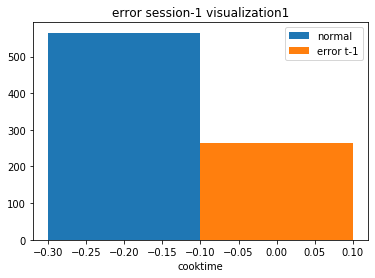

In [15]:
# 요리 시간 비교
plt.bar(-0.2, np.mean(error0.iloc[:,2]), 0.2, label = 'normal')
plt.bar(0, np.mean(error1.iloc[:,2]), 0.2, label = 'error t-1')
plt.xlabel('cooktime')
plt.title('error session-1 visualization1')
plt.legend()


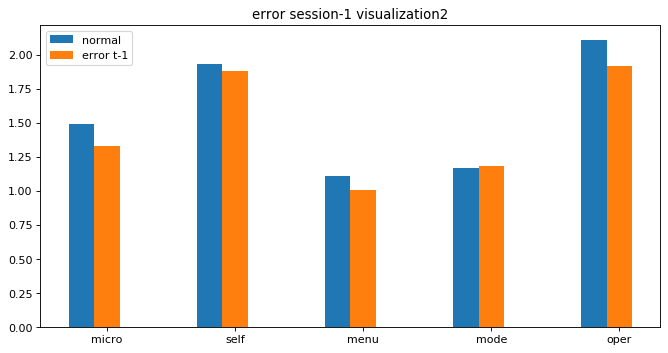

In [16]:
# 레인지모드, 기타모드, 수동요리, 메뉴 개수, 모드 개수 비교
e00 = list(round(np.mean(error0.iloc[:,[3,7,11,12,14]]), 2))
e01 = list(round(np.mean(error1.iloc[:,[3,7,11,12,14]]), 2))

x0 = np.arange(len(e00))

figure(figsize=(10, 5), dpi=80)
plt.bar(x0-0.2, e00, 0.2, label = 'normal')
plt.bar(x0, e01, 0.2, label = 'error t-1')
plt.xticks(x0, list(error0.columns[[3,7,11,12,14]]))
plt.title('error session-1 visualization2')
plt.legend()


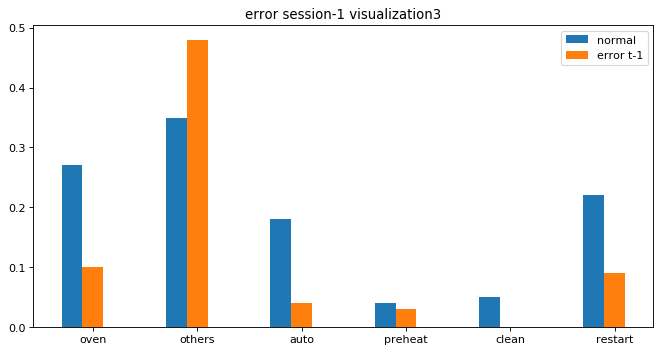

In [17]:
# 오븐모드, 자동모드, 예열, 청소, 재시작 비교
e00 = list(round(np.mean(error0.iloc[:,[4,5,6,8,9,10]]), 2))
e01 = list(round(np.mean(error1.iloc[:,[4,5,6,8,9,10]]), 2))

x1 = np.arange(len(e00))

figure(figsize=(10, 5), dpi=80)
plt.bar(x1-0.2, e00, 0.2, label = 'normal')
plt.bar(x1, e01, 0.2, label = 'error t-1')
plt.xticks(x1, list(error0.columns[[4,5,6,8,9,10]]))
plt.title('error session-1 visualization3')
plt.legend()